In [16]:
import pandas as pd
from prophet import Prophet

In [17]:
df = pd.read_csv('clean_temp.csv', parse_dates=True, index_col=0)
df = df.reset_index()
df.head(2)

,DATE,TEMP
0,1876-01-01,2.2
1,1876-01-02,2.5


In [18]:
df.rename(columns={"DATE": "ds", "TEMP": "y"}, inplace=True)
df.head(2)

,ds,y
0,1876-01-01,2.2
1,1876-01-02,2.5


In [19]:
df_train = df[df['ds'] < pd.Timestamp(2021,1,1)]
df_test = df[df['ds'] >= pd.Timestamp(2021,1,1)]

In [20]:
m = Prophet()
m.fit(df_train)

14:13:15 - cmdstanpy - INFO - Chain [1] start processing
14:13:26 - cmdstanpy - INFO - Chain [1] done processing


In [25]:
prediction = m.predict(df_test)
prediction[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
633,2022-09-26,14.864257,10.186196,19.638379
634,2022-09-27,14.650247,10.177968,19.697453
635,2022-09-28,14.494387,10.006741,19.226824
636,2022-09-29,14.280872,9.296321,18.942389
637,2022-09-30,14.112381,9.248780,18.934584


In [49]:
prediction[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2021-01-01,2.043849,-2.902578,6.980762
1,2021-01-02,1.993900,-2.899770,6.951160
2,2021-01-03,1.985454,-3.214272,6.396638
3,2021-01-04,1.998058,-2.698986,6.730693
4,2021-01-05,1.906379,-2.992622,6.646520


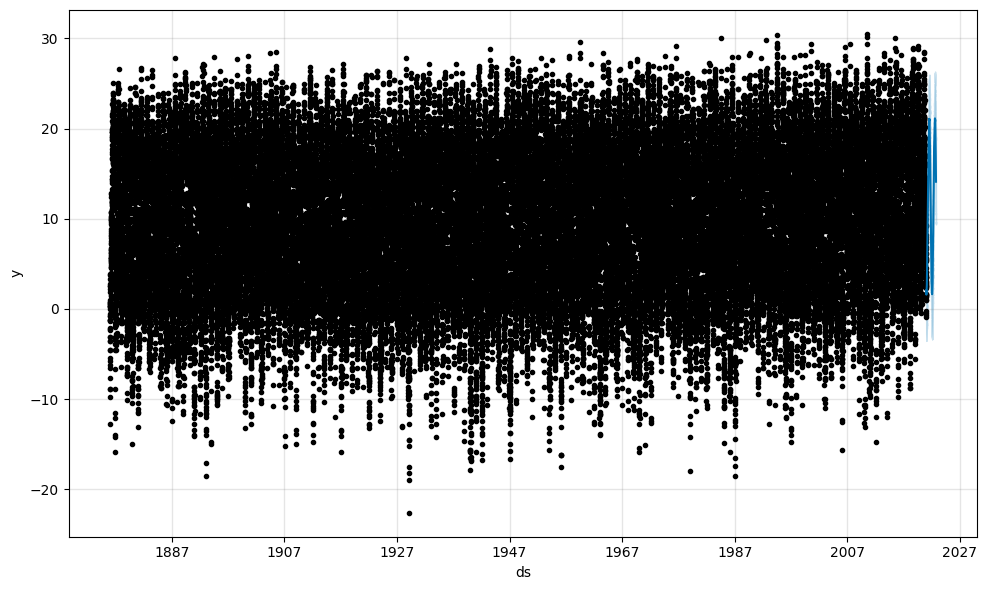

In [55]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (120, 20)
fig1 = m.plot(prediction)


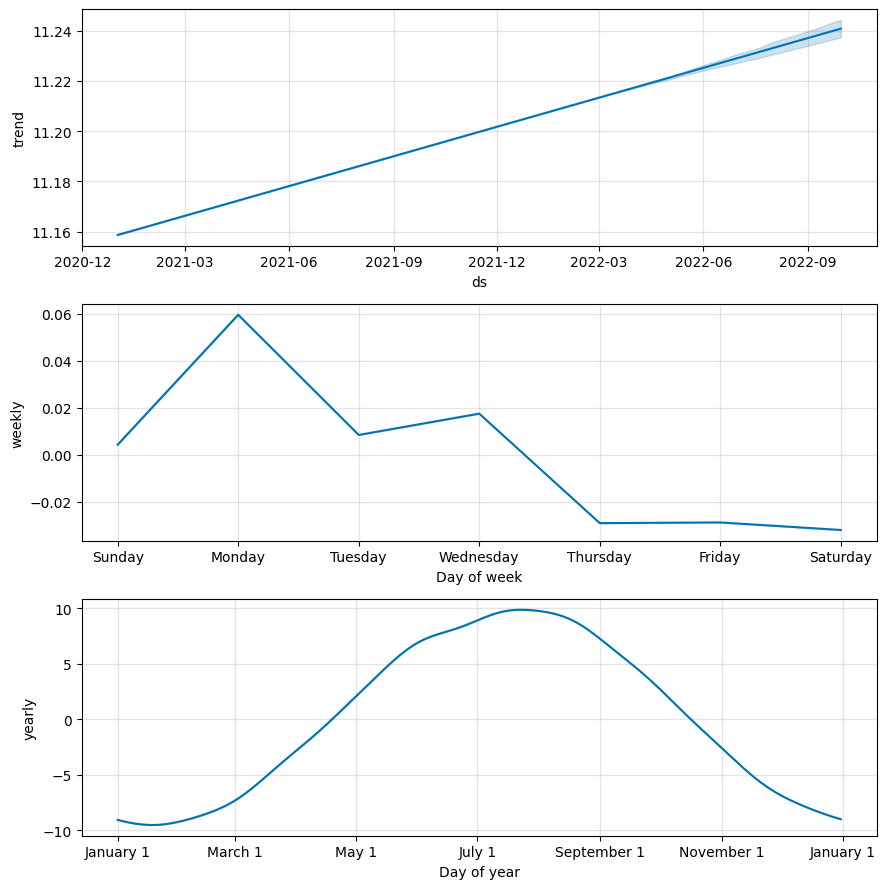

In [56]:
fig2 = m.plot_components(prediction)

In [57]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, prediction)

In [58]:
plot_components_plotly(m, prediction)


## Plot prediction

In [45]:
df_train_plot = df_train.set_index('ds')
df_train_plot = df_train_plot['2016':]

In [43]:
df_test_plot = df_test.set_index('ds')
df_pred = prediction.set_index('ds')
df_pred = df_pred[['yhat']]

In [48]:
df_pred.head()

,yhat
ds,
2021-01-01,2.043849
2021-01-02,1.993900
2021-01-03,1.985454
2021-01-04,1.998058
2021-01-05,1.906379


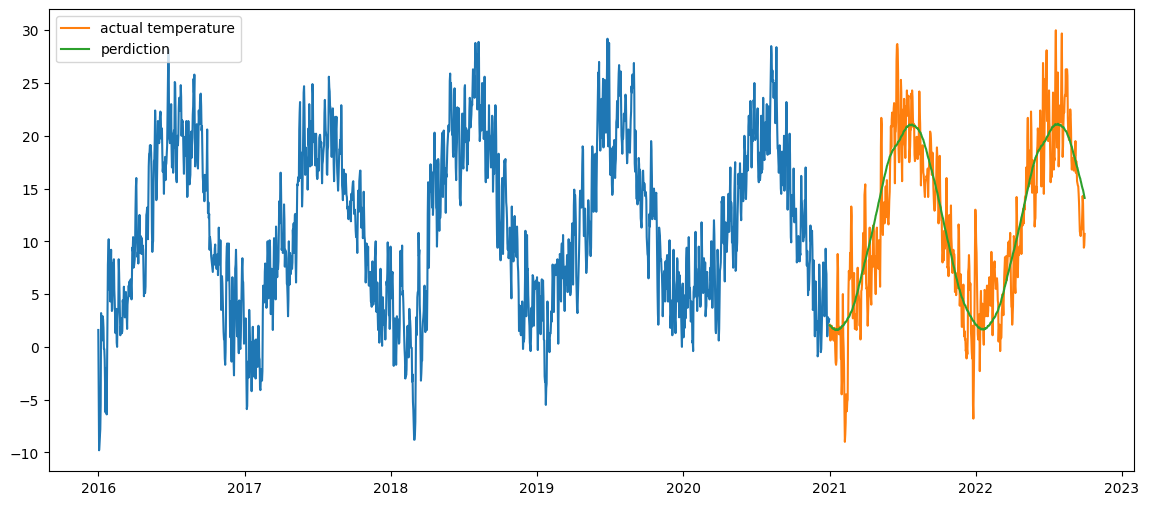

In [47]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14,6)
plt.plot(df_train_plot.index, df_train_plot['y'])
plt.plot(df_test_plot.index, df_test_plot['y'],label='actual temperature')
plt.plot(df_pred.index, df_pred['yhat'], label='perdiction')
plt.legend(loc='upper left')



## Export model

In [28]:
m = Prophet()
m.fit(df)

from prophet.serialize import model_to_json, model_from_json

with open('model_prophet.json', 'w') as fout:
    fout.write(model_to_json(m))  # Save model

14:18:29 - cmdstanpy - INFO - Chain [1] start processing
14:18:47 - cmdstanpy - INFO - Chain [1] done processing
